In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('train_day32.csv', usecols = ['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
X = df.drop('Survived',axis = 1)
y = df['Survived']

In [9]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

In [10]:
clf = DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [12]:
accuracy_score(y_pred, y_test)

0.6293706293706294

In [13]:
np.mean(cross_val_score(clf,X,y,cv=10,scoring='accuracy'))

0.6345070422535211

## Applying Discretization

In [28]:
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy ='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode ='ordinal', strategy ='quantile')
                            

In [29]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [30]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [31]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [32]:
trf.named_transformers_['first'].n_bins_

array([15])

In [33]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [34]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [35]:
output.head()

,age,age_trf,fare,fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0


In [36]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                              bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                               bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [37]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
705,39.0,11.0,26.0000,9.0,"(38.0, 42.0]","(18.75, 26.0]"
769,32.0,9.0,8.3625,4.0,"(30.0, 32.0]","(8.158, 10.5]"
540,36.0,10.0,71.0000,12.0,"(35.0, 38.0]","(51.479, 76.292]"
574,16.0,2.0,8.0500,3.0,"(6.0, 16.0]","(7.896, 8.158]"
294,24.0,5.0,7.8958,3.0,"(23.0, 25.0]","(7.775, 7.896]"


In [38]:
clf= DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [39]:
accuracy_score(y_test, y_pred2)

0.6363636363636364

In [44]:
X_trf = trf.fit_transform(X_train)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6386932707355243

In [50]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins= bins, encode= 'ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins= bins, encode='ordinal',strategy= strategy)
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('After')

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title('After')
    plt.show()

0.6275039123630672


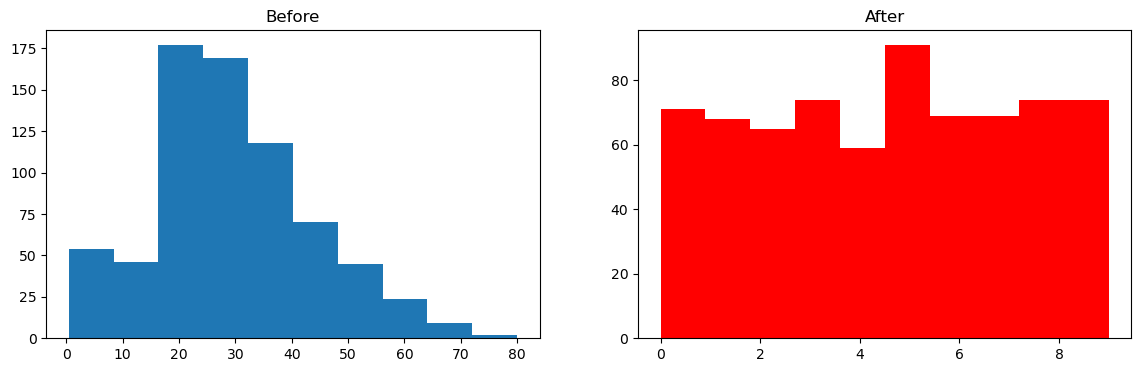

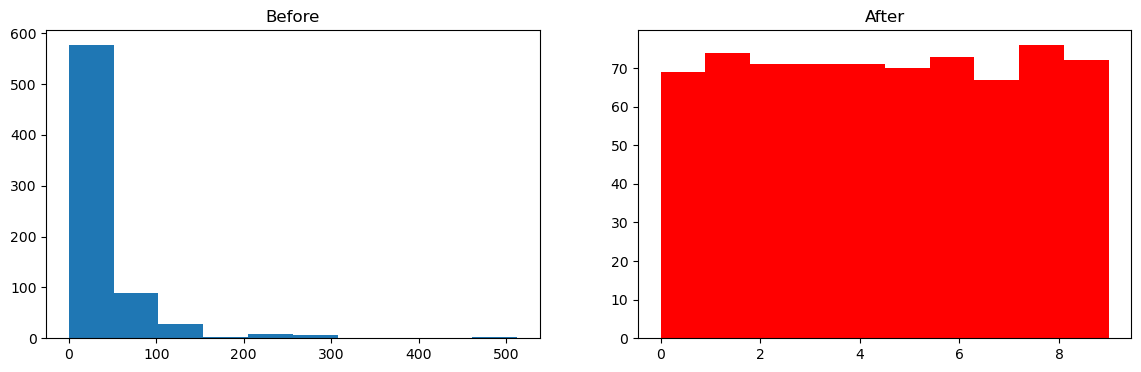

In [51]:
discretize(10,'quantile')

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6359154929577464


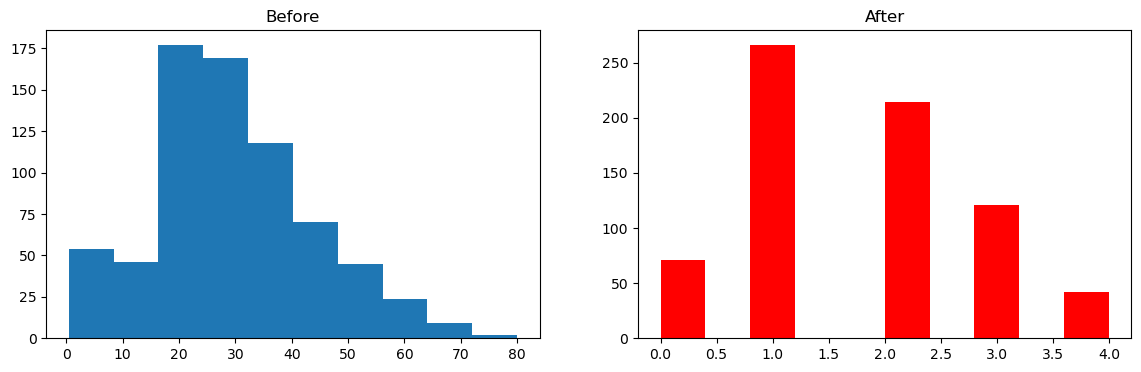

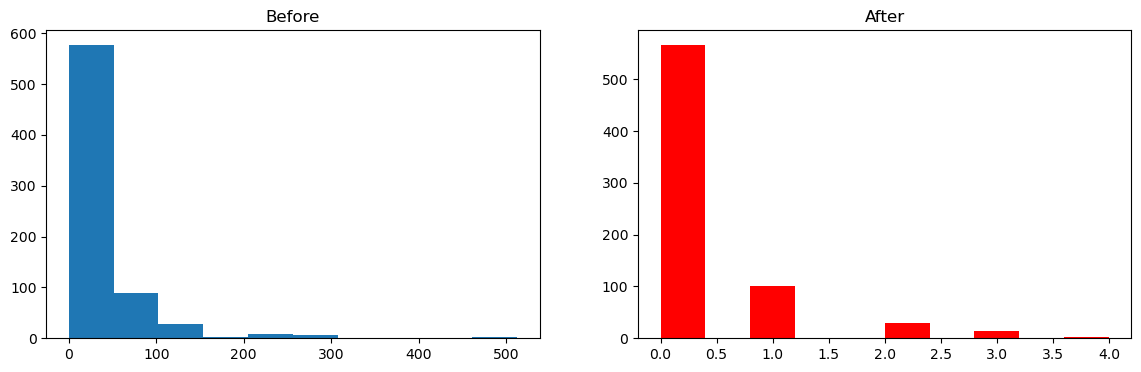

In [52]:
discretize(5,'kmeans')